In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
Img_size=224
Batch_size=32
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
tr_data=ImageDataGenerator(rescale=1./255,validation_split=0.2)

tr_gen=tr_data.flow_from_directory(
 '/content/drive/MyDrive/Internship /segmented_images/train',
 target_size=(Img_size,Img_size),
 batch_size=Batch_size,
 class_mode="categorical",
 subset="training")

Found 868 images belonging to 4 classes.


In [5]:
val_gen=tr_data.flow_from_directory(
"/content/drive/MyDrive/Internship /segmented_images/test",
target_size=(Img_size,Img_size),
batch_size=Batch_size,
class_mode="categorical",
subset="validation")

Found 134 images belonging to 4 classes.


In [7]:
class_ind=tr_gen.class_indices
class_names=list(class_ind.keys())
print(class_ind)
print(class_names)

{'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}
['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [8]:
model=keras.Sequential([
layers.Conv2D(32,(3,3),activation="relu",input_shape=(Img_size,Img_size,3)),
layers.MaxPooling2D(2,2),
layers.Conv2D(64,(3,3),activation="relu"),
layers.MaxPooling2D(2,2),
layers.Conv2D(128,(3,3),activation="relu"),
layers.MaxPooling2D(2,2),
layers.Flatten(),
layers.Dense(128,activation="relu"),
layers.Dense(4,activation="softmax")
 ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
model.fit(tr_gen,epochs=7,validation_data=val_gen,batch_size=Batch_size)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/7
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.3996 - loss: 1.2497

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


28/28 ━━━━━━━━━━━━━━━━━━━━ 309s 11s/step - accuracy: 0.4035 - loss: 1.2446 - val_accuracy: 0.3731 - val_loss: 1.6718
Epoch 2/7
28/28 ━━━━━━━━━━━━━━━━━━━━ 110s 4s/step - accuracy: 0.7046 - loss: 0.7847 - val_accuracy: 0.3731 - val_loss: 2.0934
Epoch 3/7
28/28 ━━━━━━━━━━━━━━━━━━━━ 114s 4s/step - accuracy: 0.7790 - loss: 0.5855 - val_accuracy: 0.3582 - val_loss: 2.0671
Epoch 4/7
28/28 ━━━━━━━━━━━━━━━━━━━━ 114s 4s/step - accuracy: 0.8757 - loss: 0.3671 - val_accuracy: 0.5522 - val_loss: 1.5252
Epoch 5/7
28/28 ━━━━━━━━━━━━━━━━━━━━ 112s 4s/step - accuracy: 0.8969 - loss: 0.2803 - val_accuracy: 0.5373 - val_loss: 1.1519
Epoch 6/7
28/28 ━━━━━━━━━━━━━━━━━━━━ 106s 4s/step - accuracy: 0.9627 - loss: 0.1088 - val_accuracy: 0.6194 - val_loss: 1.4090
Epoch 7/7
28/28 ━━━━━━━━━━━━━━━━━━━━ 105s 4s/step - accuracy: 0.9929 - loss: 0.0366 - val_accuracy: 0.5746 - val_loss: 1.7113


In [12]:
model.save('/content/drive/MyDrive/bt2/Alzheimer.h5')

In [13]:
model = load_model('/content/drive/MyDrive/bt2/Alzheimer.h5')
print("Model Loaded")

Model Loaded


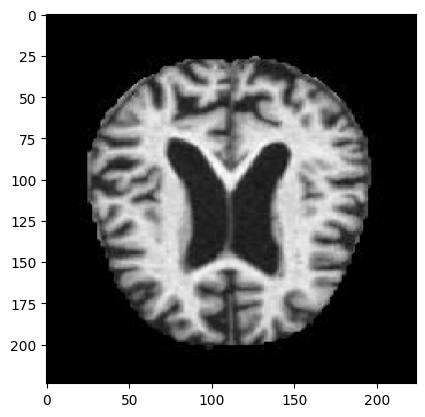

In [26]:
test_img_path="/content/drive/MyDrive/Internship /Alzheimer_s_Dataset/test/ModerateDemented/27 (2).jpg"
img=image.load_img(test_img_path,target_size=(Img_size,Img_size))
plt.imshow(img)
plt.axis()
plt.show()

In [27]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array /= 255.

pred=model.predict(img_array)

op=np.argmax(pred)
print(class_names[op])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
ModerateDemented
